In [1]:
# Get parent directory and add to sys.path
import os; import sys
import numpy as np
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
from Deliverable_5_2.LinearMPC.MPCVelControl import MPCVelControl

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
Ts = 0.05
sim_time = 15.0
H = 5.0

x0 = np.array([0, 0, 0, 0, 0, 0,
               5, 5, 10,
               0, 0, 1])

x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

#enable estimator ONLY for z-controller
mpc.mpc_z.setup_estimator()

# time-varying mass (fuel burn)
rocket.mass = 2.0
rocket.fuel_rate = 0.1

# simulate
t_cl, x_cl, u_cl, *_ , ref = rocket.simulate_control(
    mpc, sim_time, H, x0, x_target=x_target, method='nonlinear'
)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Simulating time 0.00: Fuel left: 1.00 kg, 
Simulating time 0.05: Fuel left: 1.00 kg, 
Simulating time 0.10: Fuel left: 0.99 kg, 
Simulating time 0.15: Fuel left: 0.99 kg, 
Simulating time 0.20: Fuel left: 0.99 kg, 
Simulating time 0.25: Fuel left: 0.99 kg, 
Simulating time 0.30: Fuel left: 0.99 kg, 
Simulating time 0.35: Fuel left: 0.98 kg, 
Simulating time 0.40: Fuel left: 0.98 kg, 
Simulating time 0.45: Fuel left: 0.98 kg, 
Simulating time 0.50: Fuel left: 0.98 kg, 
Simulating time 0.55: Fuel left: 0.98 kg, 
Simulating time 0.60: Fuel left: 0.97 kg, 
Simulating time 0.65: Fuel left: 0.97 kg, 
Simulating 

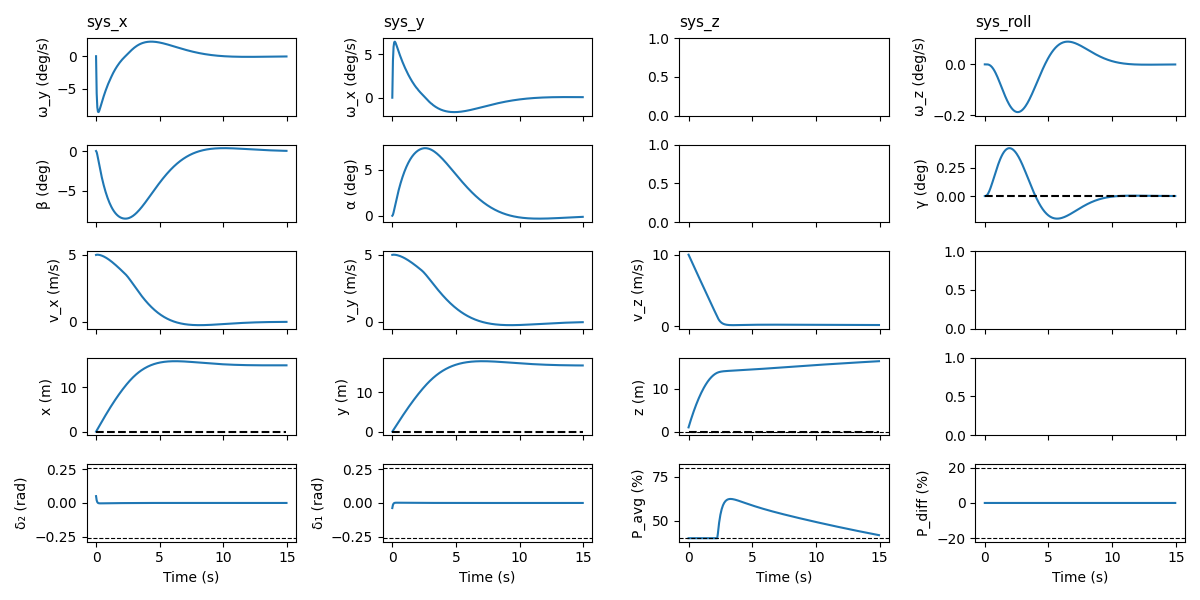

In [4]:
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, ref[:,:-1])

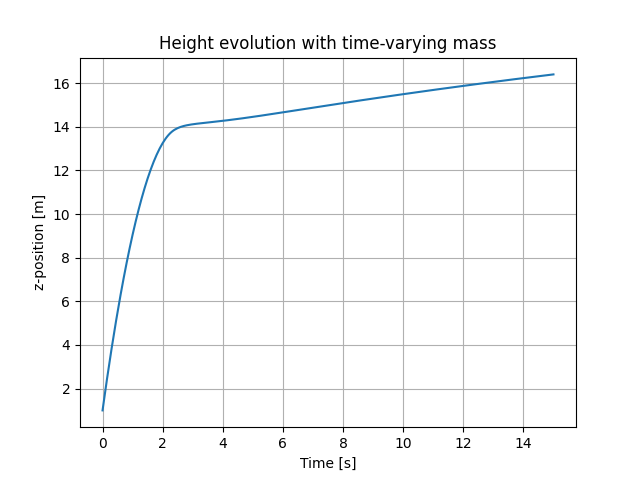

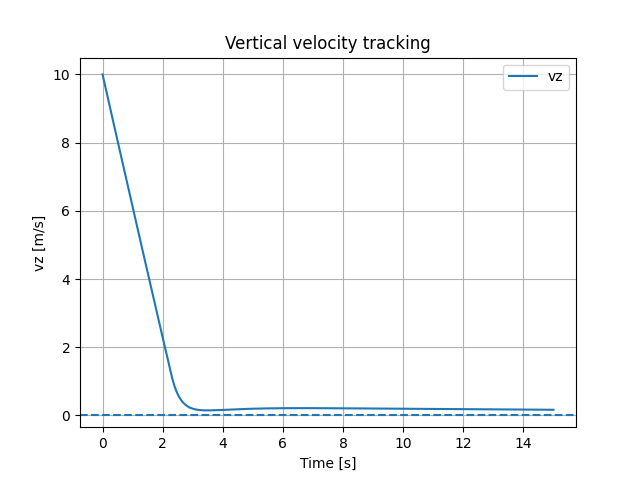

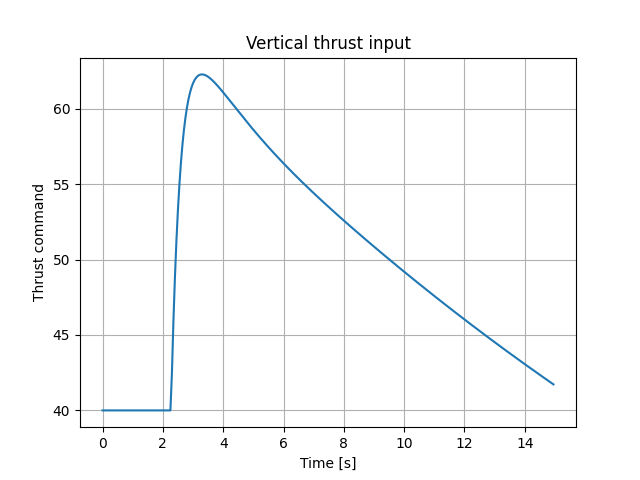

In [5]:
# z-position
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t_cl, x_cl[11, :])
plt.xlabel("Time [s]")
plt.ylabel("z-position [m]")
plt.title("Height evolution with time-varying mass")
plt.grid()
plt.show()

# z-velocity
plt.figure()
plt.plot(t_cl, x_cl[8, :], label='vz')
plt.axhline(0, linestyle='--')
plt.xlabel("Time [s]")
plt.ylabel("vz [m/s]")
plt.title("Vertical velocity tracking")
plt.legend()
plt.grid()
plt.show()

# thrust input (z)
plt.figure()
plt.plot(t_cl[:-1], u_cl[2, :])
plt.xlabel("Time [s]")
plt.ylabel("Thrust command")
plt.title("Vertical thrust input")
plt.grid()
plt.show()